In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as ss
import scipy.special as sp
import theano
import pymc3 as pm
import arviz

import sys
import logging

logging.disable(logging.ERROR)


In [83]:
pm.__version__

'3.8'

In [52]:
# http://www.stat.columbia.edu/~gelman/research/published/taumain.pdf

In [53]:
# # We begin reading the data into a pandas dataframe.
# cookies = pd.read_csv('/home/xavier/Documents/research/FORMANRISK/data/data_formanrisk/cookies.dat', sep=' ')
# cookies.shape

In [54]:
# model = pm.Model()

# with model:
    
#     # Prior distribution for mu.
#     mu = pm.Gamma('mu', alpha=2.0, beta=1.0/5)
    
#     # Prior distribution for sigma2.
#     sigma = pm.Exponential('sigma', 1.0)
    
#     # Parametrization for the shape parameter.
#     alpha =  mu**2/sigma**2
    
#     # Parametrization for the scale parameter.
#     beta = mu/sigma**2
    
#     # Prior distribution for lambda.
#     lam = pm.Gamma(
#         'lam', 
#         alpha=alpha, 
#         beta=beta, 
#         shape=cookies.location.values.max()
#     )
    
#     # Likelihood function for the data.
#     chips = [
#         pm.Poisson('chips_{}'.format(i),lam[i], 
#         observed=cookies[cookies.location==i+1].chips.values) 
#         for i in range(cookies.location.values.max())
#     ] 
    
#     # Parameters of the simulation:
#     # Number of iterations and independent chains.
#     n_draws, n_chains = 1000, 3
    
#     n_sim = n_draws*n_chains
    
#     trace = pm.sample(draws=n_draws, chains=n_chains) 

In [55]:
# pm.traceplot(trace)

# Real data

In [84]:
# We begin reading the data into a pandas dataframe.
df = pd.read_csv('/home/xavier/Documents/research/FORMANRISK/analyse/forman_cavit/output/table/df_PP.csv', 
                 index_col=0)
df.shape

(407, 65)

In [85]:
df.site.unique()

array(['biscarrosse', 'cerbere', 'ceret', 'hourtin', 'la teste', 'leiria',
       'lit et mixe', 'mimizan', 'oin_es', 'perpignan', 'ribeira',
       'san vicente', 'spain dune', 'coca', 'Bayubas', 'san cipriano',
       'oria ', 'Tamrabta', 'erderven'], dtype=object)

In [86]:
df.columns

Index(['site', 'individual', 'P50', 'Treatment', 'Species', 'code', 'P12',
       'P88', 'slope', 'Kmax', 'branch_diam', 'REP', 'x', 'y', 'Tmean_annual',
       'Mean_D_range', 'Isothermality', 'T_seasonality', 'Tmax_warmerM',
       'Tmin_coldestM', 'T_annual_range', 'Tmean_wettestQ', 'Tmean_driestQ',
       'Tmean_warmerQ', 'Tmean_coldestQ', 'P_annual', 'P_wettestM',
       'P_driestM', 'P_seasonality', 'P_wettestQ', 'P_driestQ', 'P_warmestQ',
       'P_coldestQ', 'Country', 'num', 'X', 'Y', 'elevation.m.', 'species_2',
       'sapling.age.yr..height.m.', 'adult.age.yr..height.m.',
       'sampling.dates', 'person.in.charge', 'Aridity_Index', 'acp_0', 'acp_1',
       'acp_2', 'acp_3', 'acp_4', 'acp_5', 'acp_6', 'acp_7', 'acp_8', 'acp_9',
       'acp_10', 'acp_11', 'acp_12', 'acp_13', 'acp_14', 'acp_15', 'acp_16',
       'acp_17', 'acp_18', 'acp_19', 'Groupclim'],
      dtype='object')

In [87]:
df.tail()

,site,individual,P50,Treatment,Species,code,P12,P88,slope,Kmax,...,acp_11,acp_12,acp_13,acp_14,acp_15,acp_16,acp_17,acp_18,acp_19,Groupclim
402,erderven,106.0,-3.681031,adult,pinus pinaster,NaN,NaN,NaN,NaN,NaN,...,0.16937,0.057505,-0.003269,-0.00197,-0.005407,0.007272,0.004093,0.000138,7.307999e-18,NaN
403,erderven,107.0,-3.383203,adult,pinus pinaster,NaN,NaN,NaN,NaN,NaN,...,0.16937,0.057505,-0.003269,-0.00197,-0.005407,0.007272,0.004093,0.000138,7.307999e-18,NaN
404,erderven,108.0,-3.511307,adult,pinus pinaster,NaN,NaN,NaN,NaN,NaN,...,0.16937,0.057505,-0.003269,-0.00197,-0.005407,0.007272,0.004093,0.000138,8.330547e-18,NaN
405,erderven,109.0,-3.463365,adult,pinus pinaster,NaN,NaN,NaN,NaN,NaN,...,0.16937,0.057505,-0.003269,-0.00197,-0.005407,0.007272,0.004093,0.000138,8.250102e-18,NaN
406,erderven,111.0,-3.254363,adult,pinus pinaster,NaN,NaN,NaN,NaN,NaN,...,0.16937,0.057505,-0.003269,-0.00197,-0.005407,0.007272,0.004093,0.000138,8.250102e-18,NaN


In [88]:
# One Hot Encode Data
dummies = pd.get_dummies(df.Treatment)
dummies.columns = ['adult','young']

df = pd.concat([df, dummies], axis=1)
df.head()

,site,individual,P50,Treatment,Species,code,P12,P88,slope,Kmax,...,acp_13,acp_14,acp_15,acp_16,acp_17,acp_18,acp_19,Groupclim,adult,young
0,biscarrosse,1.0,-3.818704,adult,pinus pinaster,biscarosse 1adult ...,-3.358275,-4.279133,108.594361,0.000249,...,0.0251,0.007286,0.000755,-0.005307,0.005797,-0.000713,-4.606515e-16,group_3,1,0
1,biscarrosse,1.0,-3.596950,young,pinus pinaster,biscarosse 1young ...,-2.684632,-4.509269,54.805426,0.000763,...,0.0251,0.007286,0.000755,-0.005307,0.005797,-0.000713,5.471855e-15,group_3,0,1
2,biscarrosse,2.0,-4.431870,young,pinus pinaster,biscarosse 2young ...,-3.555983,-5.307757,57.085020,0.001044,...,0.0251,0.007286,0.000755,-0.005307,0.005797,-0.000713,-3.842244e-15,group_3,0,1
3,biscarrosse,4.0,-3.855426,adult,pinus pinaster,biscarosse 4adult ...,-3.378376,-4.332476,104.810817,0.001174,...,0.0251,0.007286,0.000755,-0.005307,0.005797,-0.000713,9.050547e-16,group_3,1,0
4,biscarrosse,5.0,-3.198479,adult,pinus pinaster,biscarosse 5adult ...,-1.852982,-4.543976,37.160995,0.000166,...,0.0251,0.007286,0.000755,-0.005307,0.005797,-0.000713,6.429706e-17,group_3,1,0


In [89]:
dummies = pd.get_dummies(df.site)#, drop_first = True)
dcol = dummies.columns 

df = pd.concat([df, dummies], axis=1)
df.head()


,site,individual,P50,Treatment,Species,code,P12,P88,slope,Kmax,...,leiria,lit et mixe,mimizan,oin_es,oria,perpignan,ribeira,san cipriano,san vicente,spain dune
0,biscarrosse,1.0,-3.818704,adult,pinus pinaster,biscarosse 1adult ...,-3.358275,-4.279133,108.594361,0.000249,...,0,0,0,0,0,0,0,0,0,0
1,biscarrosse,1.0,-3.596950,young,pinus pinaster,biscarosse 1young ...,-2.684632,-4.509269,54.805426,0.000763,...,0,0,0,0,0,0,0,0,0,0
2,biscarrosse,2.0,-4.431870,young,pinus pinaster,biscarosse 2young ...,-3.555983,-5.307757,57.085020,0.001044,...,0,0,0,0,0,0,0,0,0,0
3,biscarrosse,4.0,-3.855426,adult,pinus pinaster,biscarosse 4adult ...,-3.378376,-4.332476,104.810817,0.001174,...,0,0,0,0,0,0,0,0,0,0
4,biscarrosse,5.0,-3.198479,adult,pinus pinaster,biscarosse 5adult ...,-1.852982,-4.543976,37.160995,0.000166,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df.site

0      biscarrosse
1      biscarrosse
2      biscarrosse
3      biscarrosse
4      biscarrosse
          ...     
402       erderven
403       erderven
404       erderven
405       erderven
406       erderven
Name: site, Length: 407, dtype: object

In [91]:
df[dcol].columns

Index(['Bayubas', 'Tamrabta', 'biscarrosse', 'cerbere', 'ceret', 'coca',
       'erderven', 'hourtin', 'la teste', 'leiria', 'lit et mixe', 'mimizan',
       'oin_es', 'oria ', 'perpignan', 'ribeira', 'san cipriano',
       'san vicente', 'spain dune'],
      dtype='object')

___

In [163]:
y_simple = df.P50.values
x_0 = df[dcol].values
X2 = df.adult.values
X3 = df.Aridity_Index.values

basic_model = pm.Model()

with basic_model:

    α = pm.Normal('α', mu=0, sd=10)      
        
#     sigma_est = pm.Gamma('gamma', 0.0001, 0.0001)
#     β = pm.Normal('β', mu=0, tau=sigma_est, shape = len(dcol))
    
#     sigma_est = pm.Uniform('unif', 0.0000001, 10) # change tau to sd
    sigma_est = pm.HalfCauchy('halfcauchy', 25)    
    β = pm.Normal('β', mu=0, sd=sigma_est, shape = len(dcol))    
    
    beta2 = pm.Normal("beta2", mu=0, sigma=10, shape = 1)   
    beta3 = pm.Normal("beta3", mu=0, sigma=10, shape = 1)   
    
    μ = α + pm.math.dot(x_0, β) + beta2[0]*X2 + beta3[0]*X3
    
    sigma = pm.HalfNormal("sigma", sigma=10)    
#     mean = pm.Deterministic("mean",β.mean())
#     magnitude = pm.Deterministic("magn",β.mean()/(β.max()-β.min()))
#     cv = pm.Deterministic("cv",sigma_est/β.mean())
    
    Y_obs = pm.Normal("Y_obs", mu=μ, sigma=sigma, observed=y_simple) 
    
    varb = pm.Deterministic("varb",(sigma_est*sigma_est))
    varw = pm.Deterministic("varw",(sigma*sigma))
    ratio = pm.Deterministic("ratio",(sigma_est*sigma_est)/(sigma*sigma + sigma_est*sigma_est))


In [164]:
with basic_model:
    # draw 500 posterior samples
    n_draws, n_chains = 1000, 3    
    
    n_sim = n_draws*n_chains    
    trace = pm.sample(tune = 500, draws=n_draws, chains=n_chains) 

Sampling 3 chains, 0 divergences: 100%|██████████| 4500/4500 [00:09<00:00, 470.31draws/s]


/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backend

/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backend

array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'α'}>],
       [<AxesSubplot:title={'center':'β'}>,
        <AxesSubplot:title={'center':'β'}>],
       [<AxesSubplot:title={'center':'beta2'}>,
        <AxesSubplot:title={'center':'beta2'}>],
       [<AxesSubplot:title={'center':'beta3'}>,
        <AxesSubplot:title={'center':'beta3'}>],
       [<AxesSubplot:title={'center':'halfcauchy'}>,
        <AxesSubplot:title={'center':'halfcauchy'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'varb'}>,
        <AxesSubplot:title={'center':'varb'}>],
       [<AxesSubplot:title={'center':'varw'}>,
        <AxesSubplot:title={'center':'varw'}>],
       [<AxesSubplot:title={'center':'ratio'}>,
        <AxesSubplot:title={'center':'ratio'}>]], dtype=object)

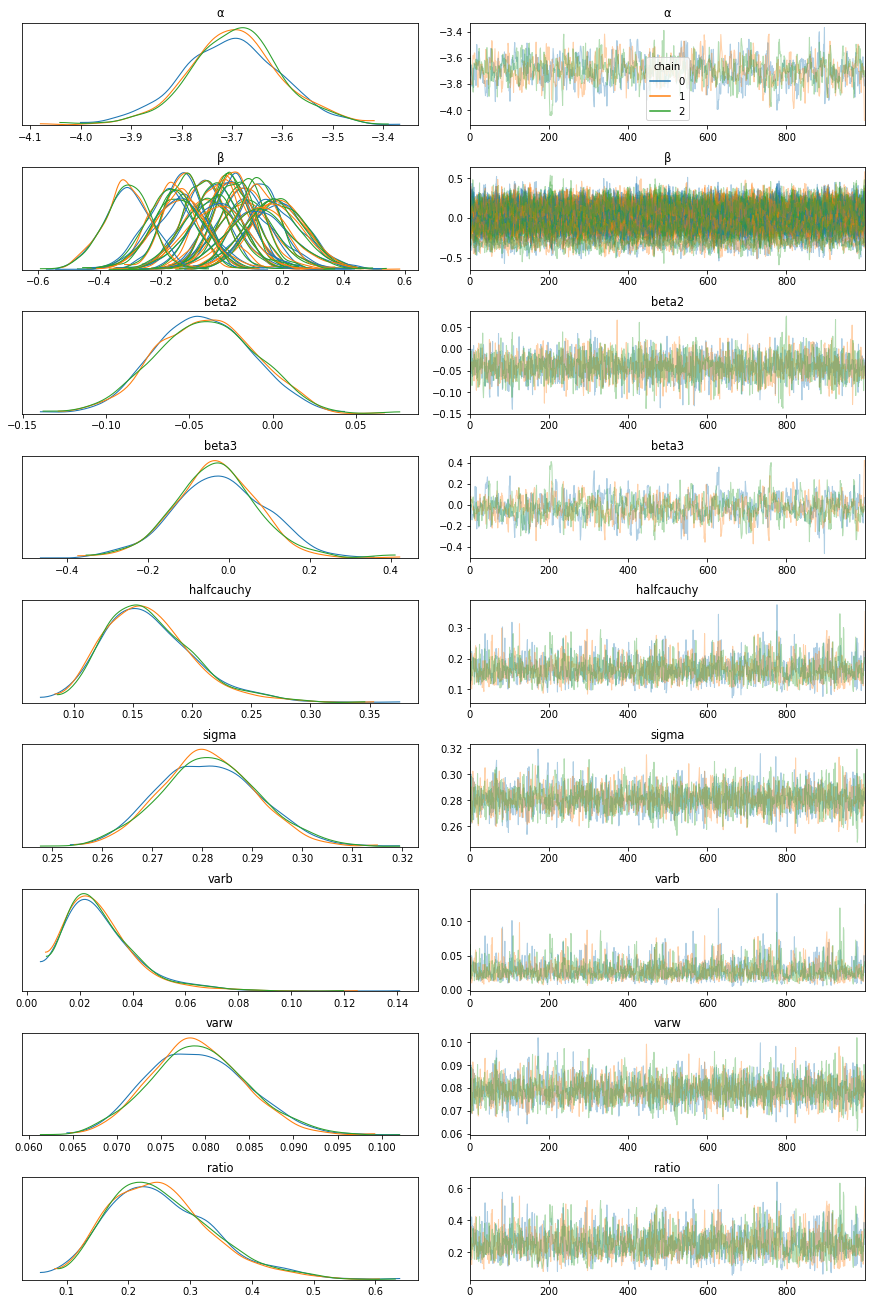

In [165]:
pm.traceplot(trace,
            combined = False,
            legend = True)

In [166]:
arviz.summary(trace, round_to=3)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,-3.696,0.095,-3.881,-3.514,0.004,0.003,714.384,708.527,728.450,896.684,1.001
β[0],0.185,0.093,0.001,0.352,0.003,0.002,1344.478,1134.558,1388.060,1542.346,1.000
β[1],0.079,0.098,-0.105,0.267,0.003,0.002,1305.715,1177.287,1336.092,1545.412,1.000
β[2],-0.058,0.072,-0.185,0.086,0.002,0.001,1917.495,1917.495,1923.340,1505.695,1.001
β[3],0.025,0.072,-0.109,0.163,0.002,0.001,1155.651,1155.651,1162.300,1308.291,1.002
β[4],0.070,0.075,-0.065,0.219,0.002,0.002,1164.823,985.419,1184.133,1382.206,1.001
β[5],-0.041,0.090,-0.208,0.132,0.002,0.002,1429.329,1429.329,1443.535,1729.376,1.002
β[6],0.188,0.091,0.008,0.346,0.002,0.001,2093.911,1851.464,2119.433,2167.767,1.001
β[7],-0.122,0.066,-0.247,0.000,0.002,0.001,1497.512,1497.512,1492.954,1715.161,1.001
β[8],0.026,0.069,-0.097,0.160,0.002,0.001,1502.955,1368.697,1510.272,1672.587,1.002


In [167]:
dfres = arviz.summary(trace, round_to=3).iloc[1:len(df[dcol].columns)+1,:]
dfres['name']=df[dcol].columns
dfres

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat,name
β[0],0.185,0.093,0.001,0.352,0.003,0.002,1344.478,1134.558,1388.060,1542.346,1.000,Bayubas
β[1],0.079,0.098,-0.105,0.267,0.003,0.002,1305.715,1177.287,1336.092,1545.412,1.000,Tamrabta
β[2],-0.058,0.072,-0.185,0.086,0.002,0.001,1917.495,1917.495,1923.340,1505.695,1.001,biscarrosse
β[3],0.025,0.072,-0.109,0.163,0.002,0.001,1155.651,1155.651,1162.300,1308.291,1.002,cerbere
β[4],0.070,0.075,-0.065,0.219,0.002,0.002,1164.823,985.419,1184.133,1382.206,1.001,ceret
β[5],-0.041,0.090,-0.208,0.132,0.002,0.002,1429.329,1429.329,1443.535,1729.376,1.002,coca
β[6],0.188,0.091,0.008,0.346,0.002,0.001,2093.911,1851.464,2119.433,2167.767,1.001,erderven
β[7],-0.122,0.066,-0.247,0.000,0.002,0.001,1497.512,1497.512,1492.954,1715.161,1.001,hourtin
β[8],0.026,0.069,-0.097,0.160,0.002,0.001,1502.955,1368.697,1510.272,1672.587,1.002,la teste
β[9],-0.134,0.090,-0.296,0.043,0.002,0.001,2226.487,2149.228,2230.235,1901.938,1.002,leiria


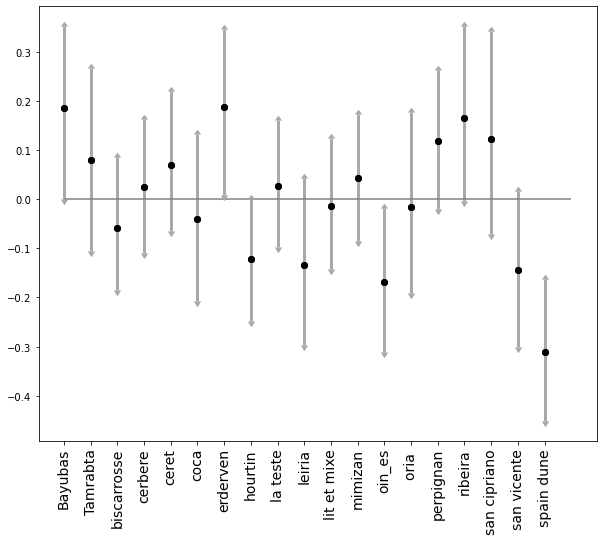

In [168]:
dyu = dfres[['hpd_97%']].values.ravel() - dfres['mean'].values.ravel()
dyl = dfres['mean'].values.ravel() - dfres[['hpd_3%']].values.ravel() 

fig, ax = plt.subplots(figsize=(10, 8))


ax.errorbar(range(len(dfres['mean'].values.tolist())), dfres['mean'].values.ravel(), 
             yerr=dyl, 
             uplims=True,
             fmt='o', color='black',
             ecolor='darkgray',
             elinewidth=3, capsize=0)

ax.errorbar(range(len(dfres['mean'].values.tolist())), dfres['mean'].values.ravel(), 
             yerr=dyu, 
             lolims=True,
             fmt='o', color='black',
             ecolor='darkgray',
             elinewidth=3, capsize=0)

plt.xticks(range(len(dfres['mean'].values.tolist())),dfres['name'], rotation=90, fontsize=14)

ax.hlines(0, 0, len(dfres['mean'].values.tolist()),color='gray')

plt.show()

In [138]:
dy = dfres[['hpd_97%']].values.ravel() - dfres['mean'].values.ravel()
dy

array([0.176, 0.18 , 0.12 , 0.141, 0.148, 0.171, 0.165, 0.117, 0.122,
       0.168, 0.128, 0.117, 0.139, 0.177, 0.143, 0.157, 0.191, 0.158,
       0.137])

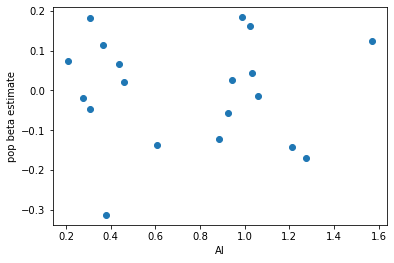

In [139]:
plt.scatter(df.groupby('site').Aridity_Index.mean().values.ravel(), dfres['mean'].values.ravel())
plt.xlabel('AI')
plt.ylabel('pop beta estimate')
plt.show()

(array([1., 4., 7., 7.]),
 array([-0.313  , -0.18875, -0.0645 ,  0.05975,  0.184  ]),
 <BarContainer object of 4 artists>)

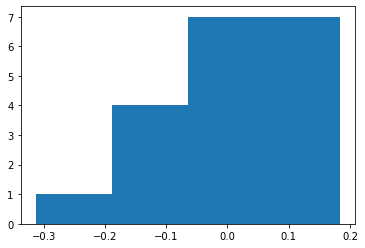

In [140]:
plt.hist(dfres['mean'].values.ravel(), bins = 4)

In [96]:
Y = df.P50.values

X1 = df.acp_0.values
X2 = df.acp_1.values
X3 = df.adult.values

X4 = df.g1.values
X5 = df.g3.values


basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=-3.8, sigma=1)
    
    beta2 = pm.Normal("beta2", mu=0, sigma=1, shape = 1)
    beta3 = pm.Normal("beta3", mu=0, sigma=1, shape = 2)
    
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha  + beta2[0]*X3 + beta3[0]*X4 + beta3[1]*X5 

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [97]:
with basic_model:
    # draw 500 posterior samples
    n_draws, n_chains = 1000, 3    
    n_sim = n_draws*n_chains    
    trace = pm.sample(tune = 500, draws=n_draws, chains=n_chains) 

Sampling 3 chains, 0 divergences: 100%|██████████| 4500/4500 [00:01<00:00, 2449.56draws/s]


/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backend

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta2'}>,
        <AxesSubplot:title={'center':'beta2'}>],
       [<AxesSubplot:title={'center':'beta3'}>,
        <AxesSubplot:title={'center':'beta3'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

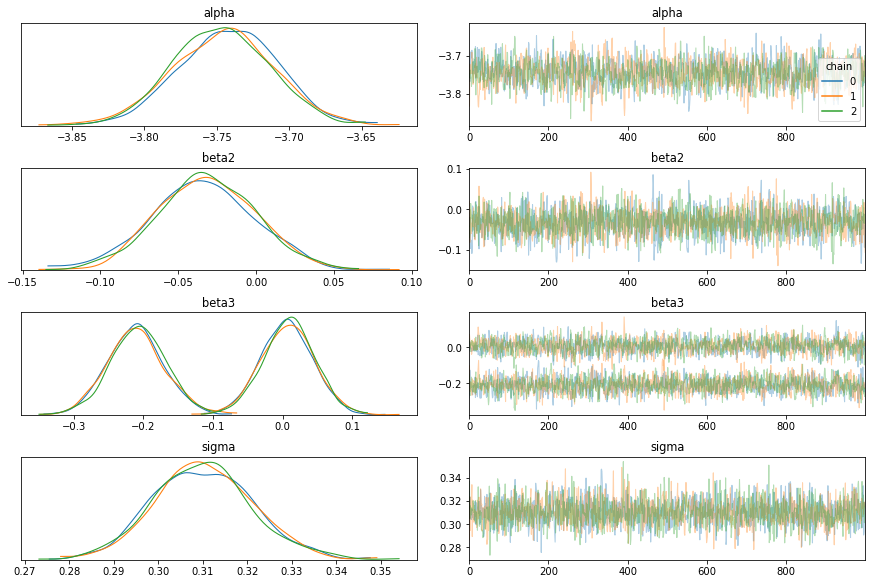

In [98]:
pm.traceplot(trace,
            combined = False,
            legend = True)

In [43]:
with basic_model:
    display(arviz.summary(trace, round_to=3))



,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,-3.740,0.197,-4.095,-3.379,0.008,0.006,582.223,579.987,582.468,664.470,1.002
β[0],0.074,0.110,-0.141,0.269,0.004,0.003,733.248,612.373,744.752,980.889,1.001
β[1],0.121,0.113,-0.087,0.331,0.004,0.003,737.332,651.079,754.968,899.474,1.001
β[2],-0.075,0.066,-0.197,0.051,0.002,0.001,1545.004,1545.004,1546.133,1895.957,1.002
β[3],0.079,0.072,-0.058,0.211,0.002,0.001,1374.110,1281.670,1379.154,1798.129,1.002
β[4],-0.110,0.108,-0.297,0.111,0.003,0.002,1215.188,1215.188,1216.103,1505.364,1.001
β[5],0.039,0.079,-0.106,0.191,0.002,0.002,1065.745,1065.745,1067.740,1278.294,1.001
β[6],0.046,0.079,-0.114,0.186,0.002,0.002,1272.537,1251.413,1273.258,1582.160,1.001
β[7],-0.118,0.106,-0.326,0.069,0.004,0.003,722.636,722.636,727.981,889.602,1.002
β[8],0.170,0.126,-0.050,0.408,0.005,0.004,685.525,627.645,699.420,827.893,1.001
